In [1]:
%matplotlib inline

In [35]:
import matplotlib as mpl
mplpars = {'mathtext.fontset':'stix', 'font.family': 'STIXGeneral', 'font.size': 20,
           'lines.linewidth': 2, 'figure.dpi': 100, 'figure.figsize': (9,7),
           'legend.fontsize': 20.0, 'legend.frameon': False,}
mpl.rcParams.update(mplpars)
from IPython.display import HTML, Latex, Javascript
from matplotlib import animation
from os.path import expandvars, join
from helperfuncs import search_indx
from scipy.optimize import curve_fit

In [10]:
!pwd

/export/scratch/hspc48/stnv031/plotdata


In [11]:
ddir = 'reionization/k-0.9/'
tser = pc.read_ts(datadir=ddir)

#tser = pc.read_ts(datadir=ddir, filename='time_series_new2.dat')
#ts2 = pc.read_ts(datadir=expandvars('/work/stnv031/reionization_simulation/nu_tdep_k-0.9/data'))
print('last time in simulation: %.1f' % tser.zredshift[-1])

Read 2044 lines.
last time in simulation: 159.2


In [12]:
pars = pc.read_param(quiet=True, datadir=ddir)
dim = pc.read_dim(datadir=ddir)
par2 = pc.read_param(quiet=True, param2=True, datadir=ddir)
try:
    print('nu  = {0:.1e}\nnu2 = {1:.1e}'.format(par2.nu, par2.nu2))
    nu = '{0:.0e}'.format(par2.nu)
    nu2 = '{0:.0e}'.format(par2.nu2)
    print(nu, nu2)
except AttributeError:
    nu = par2.nu_hyper3
    nu2 = 0.

nu  = 1.0e-17
nu2 = 1.0e-15
1e-17 1e-15


In [13]:
ii = search_indx(tser.zredshift,  3000, eps=10)
#ii2 = search_indx(ts2.zredshift,  200, eps=10)
print(ii, '%.1e' % tser.urms[ii+1], '%.0f' % tser.alpha_drag[ii])#, ii2)
brel = (tser.brms[0] - tser.brms[-1])/tser.brms[0]
print(1-brel**2)

423 1.8e-03 2888
0.773650011117


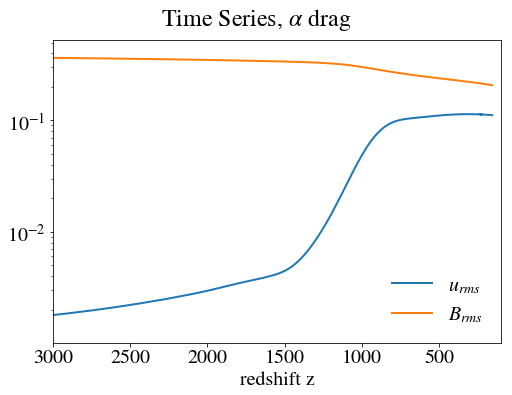

In [36]:
tsfig, tsax =  plt.subplots(figsize=(8,6))
tsax.plot(tser.zredshift, tser.urms, label='$u_{rms}$')
#tsax.plot(tser.zredshift, tser.brms**2/tser.alpha_drag)
#tsax.plot(tser.zredshift, tser.urms)
tsax.plot(tser.zredshift, tser.brms,  label='$B_{rms}$')
#tsax.plot(ts2.zredshift, ts2.urms*tser.brms[ii]/ts2.brms[ii2])
#tsax.plot(tser.zredshift, tser.umax)
#tsax.plot(ts2.zredshift, ts2.brms*tser.brms[ii]/ts2.brms[ii2])
tsax.set_yscale('log')
#tsax.set_ylim(1e-, 10)
tsax.set_xlabel('redshift z')
tsax.legend(loc='lower right', ncol=1)
tsax.set_xlim(3000, 100)
tsfig.suptitle(r'Time Series, $\alpha$ drag')
tsfig.tight_layout(pad=2)
#tsfig.savefig('tser_drag_nu_{0}_{1}.png'.format(nu, nu2))

In [37]:
tb, powerb = pc.read_power('power_mag.dat', datadir=ddir)
tu, poweru = pc.read_power('power_kin.dat', datadir=ddir)
print(tb[-1], tb.shape, powerb.shape, poweru.shape)

5.20014517222 (131,) (131, 768) (131, 768)


In [19]:
plottimes = []
#for t in [0.1,0.4,1,2,2.2,2.4,2.6,2.8,4,5,5.5]:#,4,5,10,20,50,100]: #np.arange(0.3, 5, .1, dtype='float32'):
for t in [.1, 1, 2., 2.8, 4,5.5, 6.]:
    try:
        tii = search_indx(tb, t)
        if tii is not None:
            plottimes.append(tii)
    except IndexError:
        continue

print(plottimes)

[25, 50, 70, 100]


In [20]:
for tt in tb:
    ti = search_indx(tser.t, tt, eps=.005)
    try:
        print('\r index: %03i, time: %.2f, tser time: %.2f' %(ti, tt, tser.t[ti]), end='')
    except TypeError:
        break

 index: 2029, time: 5.20, tser time: 5.20

In [21]:
krms = np.loadtxt(join(ddir,'power_krms.dat')).flatten()[:dim.nxgrid//2]
print(krms.shape, krms[-1])

(768,) 767.0


In [22]:
if par2.nu_hyper3 < 1e-16:
    vis = 'low' 
elif par2.nu_hyper3 < 1e-15:
    vis = 'medium'
else:
    vis = 'standard'
print(vis)

low


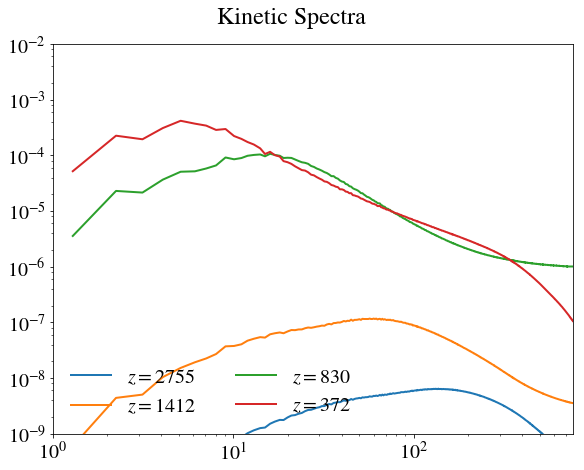

In [25]:
kfig, kax = plt.subplots()
for u,pu in enumerate(poweru):
    if u in plottimes:
        ti = search_indx(tser.t, tu[u], eps=.05)
        kax.loglog(krms,pu, label=r'$z = %.0f$' %tser.zredshift[ti])
#kax.plot(krms[1:], [5e-3*k**-0.9 for k in krms[1:]], color='black')
kax.set_ylim(1e-9, 1e-2)
kax.set_xlim(1,krms[-1])
kax.legend(loc='lower left', ncol=2)
kfig.suptitle('Kinetic Spectra')
kfig.tight_layout(pad=2)
fname = 'k-0.9_kinetic_spectra_nu_{0}_{1}.pdf'.format(nu, nu2)
#print(fname)
#kfig.savefig(fname)

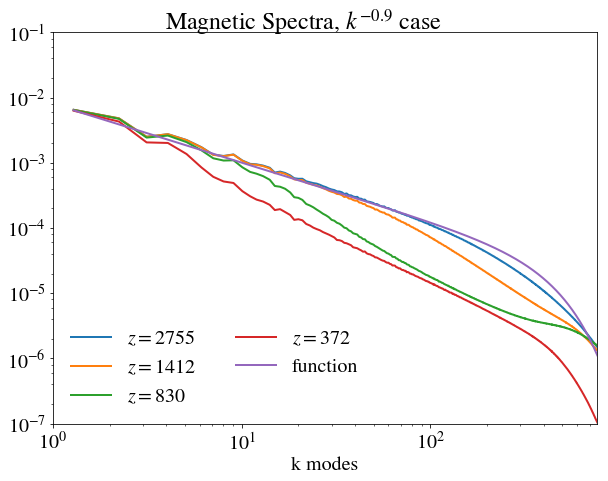

In [26]:
sfig, sax = plt.subplots()
for p,pb in enumerate(powerb):
    if p in plottimes:
        ti = search_indx(tser.t, tb[p], eps=.05)
        sax.loglog(krms,pb, label=r'$z = %.0f$' %tser.zredshift[ti])
#sax.plot(krms[1:], [5e-2*k**-1.66 for k in krms[1:]], color='black')
sax.set_ylim(1e-7, 1e-1)
sax.set_xlim(1,krms[-1])
sax.set_xlabel('k modes')
A=8e-3; kd=450; b=-0.9
sax.plot(krms[1:], [A*k**b*np.exp(-(k/kd)**2) for k in krms[1:]], label='function')
sax.legend(loc='lower left', ncol=2)
sfig.suptitle('Magnetic Spectra, $k^{-0.9}$ case')
sfig.tight_layout(pad=1.4)
fform = 'pdf'
filename = 'k09_magnetic_spectra_nu_{0}_{1}.{2}'.format(nu, nu2,fform)
#print(filename)
#sfig.savefig(filename)
#sfig.savefig(filename)

In [38]:
from numpy import exp
def cutoffk2(k, kd, a, b, d):
    return a*k**b*exp(-(k/kd)**d)

def redshift(t, z0=5200):
    return (1+z0)*exp(-2/3*t)-1


def logcutoff(k, kd, A, b, d):
    return A - b*np.log10(k) - (k/kd)**d

In [39]:
opts = np.zeros(shape=(len(tb), 2))
p01=( 60, 3e-3, -0.9, 3)
for p,pb in enumerate(powerb):
    #po, pco = curve_fit(cutoffk2, np.log10(krms[1:]), np.log10(pb[1:]), p0=(660, 3e-3, -0.9, 3), 
    #                    bounds=([100,1e-3, -1.66, 0], [np.inf, 5e-3, -0.5, 4]))
    #po, pco = curve_fit(lambda k,kd: logcutoff(k, kd, A=-2.5,b=0.9, d=2), krms[1:], np.log10(pb[1:]), p0=( 900))
    po, pco = curve_fit( lambda k,A, kd: A*k**-0.9*np.exp(-(k/kd)**2), krms[1:], pb[1:], p0=(1e-2, 800))
    #try:
    #    po, pco = curve_fit(logcutoff, krms[1:], np.log10(pb[1:]), p0=p01)
    #except RuntimeError:
    #    print('\r %i' % p, end='')
    if p==0:
        print(po)
        po1 = po
    p01 = po
    opts[p,:] = po
print(opts.shape)

[  8.58837465e-03   7.34955114e+02]
(131, 2)


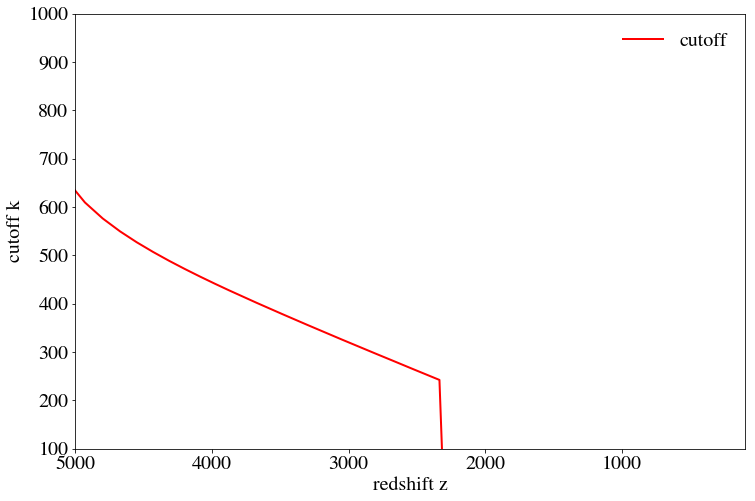

In [40]:
f2, aa2 = plt.subplots(figsize=(12,8))
#l1 = a2.plot(redshift(tb), opts[:,2], label='power')
#aa2 = a2.twinx()
aa2.set_xlim(5000, 100)
#a2.set_ylabel('power')
aa2.set_ylabel('cutoff k')
aa2.set_ylim(100, 1000)
#aa2.set_yscale('log')
aa2.set_xlabel('redshift z')
l2 = aa2.plot(redshift(tb), opts[:,1], 'r', label='cutoff')
#lns = l1 + l2
#labs = [ln.get_label() for ln in lns]
#a2.legend(lns, labs, loc='upper left')
#a2.set_ylim(-1.8, -0.7)
aa2.legend()
fname = 'cutoff_only_kd_nu_{0}_{1}.pdf'.format(nu, nu2)
#print(fname)
#f2.savefig(fname)

In [43]:
#cutoff_data = np.array([redshift(tb), opts[:,0]]).transpose()
#np.savetxt('cutoff_data_kd_only.dat', cutoff_data)

In [59]:
# First set up the figure, the axis, and the plot element we want to animate
plt.ioff()
fig = plt.figure(figsize=(9,7))
ax = plt.axes(xlim=(1,768), ylim=(1e-7, 1e-1))#xlim=(1,512), ylim=(1e-7, 1e-2))
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('k mode')
ax.set_ylabel(r'$E_B(k,z)$')
line, = ax.plot([], [], lw=2)
#line2, = ax.plot([], [], lw=2)
txt = ax.text(760, 5e-2, 'z = ', ha='right')
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    #line2.set_data([], [])
    return line,#line2

# animation function.  This is called sequentially
def animate(i):
    ts = search_indx(tser.t, tb[i], eps=0.01)
    powi = powerb[i,1:]
    #fiti = logcutoff(krms[1:], *opts[i,:])
    txt.set_text('z = %.0f' %tser.zredshift[ts])
    #line.set_data(np.log10(krms[1:]), fiti)
    line.set_data(krms[1:], powi)
    #line.set_data(x,y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=130, interval=1, blit=True, repeat=False)

plt.close()
# call our new function to display the animation

In [63]:
anim.save('k-09_spectra_anim.mp4', writer=animation.MencoderWriter())

/home/hslxrsrv3/stnv031/.local/lib/python3.5/site-packages/ipykernel/__main__.py:1: MatplotlibDeprecationWarning: Support for mencoder is only partially functional, and will be removed entirely in 2.2. Please use ffmpeg instead.
  if __name__ == '__main__':


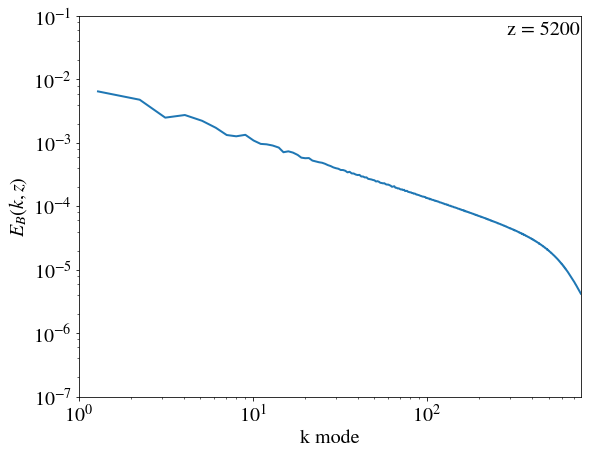

In [61]:
fig2 = plt.figure(figsize=(9,7))
ax2 = plt.axes(xlim=(1,768), ylim=(1e-7, 1e-1))#xlim=(1,512), ylim=(1e-7, 1e-2))
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlabel('k mode')
ax2.set_ylabel(r'$E_B(k,z)$')
line, = ax2.plot(krms[1:], powerb[0,1:], lw=2)
ts = search_indx(tser.t, tb[0], eps=0.01)
txt = ax2.text(760, 5e-2, 'z = %.0f' %tser.zredshift[ts], ha='right')
fig2.savefig('k-09_spectra_frame0.png')

In [25]:
verbose = False

In [29]:
tser = pc.read_ts(datadir=ddir)
t3k = search_indx(tser.zredshift, 3000, eps=5)
b0 = tser.brms[t3k]
print(t3k, b0)

Read 2044 lines.
424 0.364662


In [30]:
# redshift and derivatives
z = tser.zredshift
dz = z[1:] - z[:-1]
dz1 = -2/3*tser.dt*(1+5200)*np.exp(-2/3*tser.t)
#
# Magnetic field scale in our simulation
B_phys = 1.32e-6
#
# physical parameters
rho_crit = 8.62e-30
omega_b = 0.0486
rho_gamma = 4.17e-13
rho_b = rho_crit*omega_b
#
# scaling parameters
B3k = tser.brms[t3k]*B_phys
print(tser.brms[t3k])
nG = 1.0e-9
B_fac = B3k/nG
print('B_fac = ', B_fac)
c = 3e10
vA_phys = B_phys/np.sqrt(4*np.pi)
cs_phys = 5.76e5
#vA_phys =  1.5e-5*(B_phys/nG)*c*(1 + z)**.5
#B_phys/np.sqrt(4*np.pi) # in Gauss
#
#print('vA_phys = %.2e' % vA_phys)
#
# scale the magnetic field
#
brms_phys = tser.brms*vA_phys
urms_phys = tser.urms*vA_phys #cs_phys #/c
print('B_0 = %.2e' % brms_phys[0])
#
# Scale the drag force
#
alpha_phys = tser.alpha_drag#*vA_phys
#print(tser.brms[1000], tser.urms[1000], tser.t[1000])
Em = 0.5*brms_phys**2 #*0.1655
Ek = 0.5*urms_phys**2 #*(6000/3e5)
#
# calculate Energies
#
#Em = 0.5*tser.brms**2
#Ek = 0.5*tser.urms**2
#
s = '%.2e' % rho_b
Latex(r'$$ \rho_b = %s\times 10^{%s}$$' %(tuple(s.split('e'))))

0.364662
B_fac =  481.35384
B_0 = 1.47e-07


<IPython.core.display.Latex object>

In [31]:
print(Em[200], Ek[200], tser.zredshift[200])

1.00685142153e-14 1.27084917119e-19 4394.9551


In [32]:
scale = rho_gamma*B_fac**2
#
dEm_dz = np.diff(Em)/dz
dEk_dz = np.diff(Ek)/dz
#
dEm_dlnz = np.diff(Em)/dz*z[:-1]/scale#*(rho_b/rho_gamma)
dEk_dlnz = np.diff(Ek)/dz*z[:-1]/scale#*(rho_b/rho_gamma)
#
#Eges = Em + Ek
#dEgesdz = np.diff(Eges)/dz
dEgesdlnz = dEm_dlnz + dEk_dlnz #np.diff(Eges)/dz*z[:-1]
#
#heatrate = 2/3*666*dvA2dz
print(dEk_dlnz[t3k])
drag_unscaled = tser.alpha_drag*tser.urms**2
drag = 3/2*tser.alpha_drag*urms_phys**2/scale #*(rho_b/rho_gamma)*(1+z) #/scale
print(drag[t3k], drag_unscaled[t3k], scale)

-4.78800935046e-12
1.97024767262e-08 0.00915285331162 9.66195335409e-08


In [33]:
zz1 = search_indx(z, 1100, eps=5)
zz2 = search_indx(z, 850, eps=5)
po, pco = curve_fit(gaussian, z[zz1:zz2], dEm_dlnz[zz1:zz2], p0=(2e-2,950,6e4))
print(po, zz1, zz2)

NameError: name 'curve_fit' is not defined

In [25]:
print(nu)
s1 = nu.split('e')
s = r'{0:.0f}\times 10^{{{1}}}'.format(float(s1[0]), s1[1])
print(s)
e1 = nu2.split('e')
e = r'{0:.0f}\times 10^{{{1}}}'.format(float(e1[0]), e1[1])

nuf = par2.nu
nu2f = par2.nu2
if nu2 != 0:
    nu_tdep = nu2f + (nuf-nu2f)/(1.+1000.*np.exp(-0.01*tser.zredshift))
else:
    nu_tdep = nu*np.ones(shape=len(tser.zredshift))

1e-17
1\times 10^{-17}


In [26]:
diffEdrag = abs(dEgesdlnz- drag[:-1])
#
#diffsmooth = 1/2*(diffEdrag[1::2]+diffEdrag[:-1:2])
#smooth2 = 1/2*(diffsmooth[1::2] + diffsmooth[:-1:2])
print(len(diffEdrag), len(z[:-1]))

2043 2043


In [27]:
from scipy.signal import savgol_filter

smooth3 = savgol_filter(diffEdrag,51, 3)
print(smooth3.shape, type(smooth3), np.where(z < 4000)[0][0])

(2043,) <class 'numpy.ndarray'> 273


In [33]:
search_indx(z, 1800, eps=5)
search_indx(z, 3000, eps=5)

424

In [38]:
po1, pco1 = curve_fit(powerlaw, z[424:619] , dEm_dlnz[424:619], p0=(2e-8, 0.01))
print(po1)
print(powerlaw(z[414], *po1), powerlaw(z[619],*po1))

[  1.43766461e-08   4.03458805e-02]
1.98789443918e-08 1.94541276421e-08


k09_heat_rate_physunits.pdf


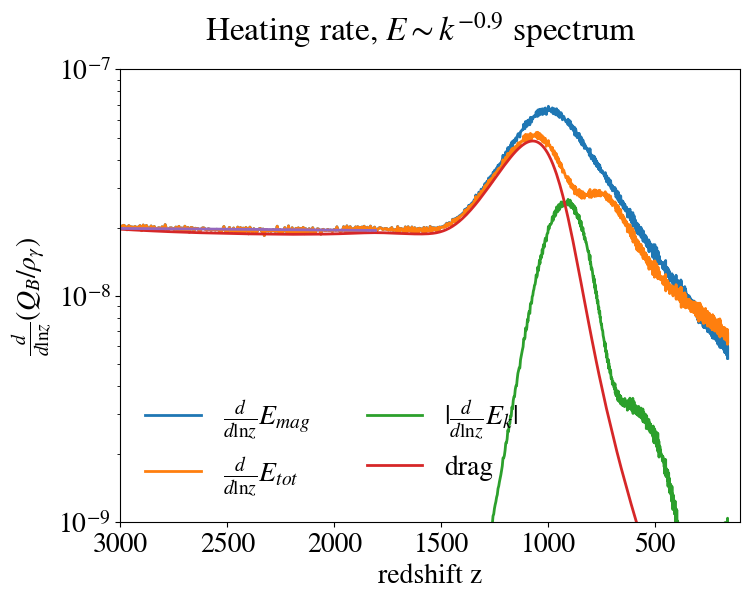

In [37]:
hfig2, hax2 = plt.subplots(figsize=(8,6))
logscalex = False
#hax2.plot(z, vA2, label=r'$v_A^2$')
#hax2.plot(z[:-1], heatrate, label=r'$\frac{d}{dz}v_A^2$')
l1 = hax2.plot(z[:-1], dEm_dlnz, label=r'$\frac{d}{d\ln z} E_{mag}$')#label=r'$\frac{d}{d\ln z}v_A^2$') #r'$\frac{d}{d\ln z}v_A^2$',)
l4 = hax2.plot(z[:-1], dEgesdlnz, label=r'$\frac{d}{d\ln z}E_{tot}$')
l5 = hax2.plot(z[:-1], abs(dEk_dlnz), label=r'$\left|\frac{d}{d\ln z}E_{k}\right|$') #r'$\frac{d}{d\ln z}v_A^2$',)
#hax2.plot(z[zz1:zz2], gaussian(z[zz1:zz2], *po), color='black') #label='gaussian fit',
l2 = hax2.plot(tser.zredshift, drag, label='drag' )#r'$\alpha u^2\cdot 3/2$', linewidth=3) #r'$\alpha \cdot u^2$', linewidth=3.5)
lf = hax2.plot(z[424:619], powerlaw(z[424:619], *po1))
#l6 = hax2.plot(z[:-1], smooth3)
#hax2.plot(z[:-1], 0.5*dvA2dz*z[:-1] + 0.5*dvk2dz*z[:-1], label=r'$\frac{d}{d\ln z}E_{ges}$',)
#twx = hax2.twinx()
#twx.set_yscale('log')
#twx.set_ylabel(r'$\nu_3(t)$')
#l3  = twx.plot(tser.zredshift, nu_tdep, color='purple', label=r'$\nu_{tdep}$', linewidth=3)
#lns = l1 + l2 + l4 + l6
#lbls = [l.get_label() for l in lns]
hax2.set_ylim(1e-9, 1e-7)
hax2.set_xlabel('redshift z')
hax2.set_ylabel(r'$\frac{d}{d\ln z}(Q_B/\rho_\gamma)$')
hax2.set_yscale('log')
#hax2.vlines(1000, 1e-9, 1e-7)
#hax2.set_xscale('log')
hax2.legend(loc='lower left', ncol=2)
#hax2.legend(lns, lbls, loc='lower left', ncol=2)
#hax2.text(3500, 6e-2, r'$\nu_{{start}}={0}$'.format(s))
#hax2.text(3500, 4e-2, r'$\nu_{{end}}={0}$'.format(e))
hfig2.suptitle(r'Heating rate, $E\sim k^{-0.9}$ spectrum')
#hfig2.tight_layout(pad=2)
if logscalex:
    hax2.set_xscale('log')
    hax2.set_xlim(100,3000)
    filename = 'k09_heat_rate_physunits_log.pdf'.format(nu,nu2)
else:
    hax2.set_xlim(3000,100)
    filename = 'k09_heat_rate_physunits.pdf'.format(nu,nu2)
hfig2.savefig(filename)
print(filename)

In [ ]:
with open('smoothed_diff.dat', 'wb') as sfile:
    np.savetxt(sfile, smooth3)

In [ ]:
head = '{0:-^25}{1:-^25}{2:-^25}{3:-^25}{4:-^25}{5:-^25}{6:-^25}{7:-^25}{8:-^25}{9:-^25}'.format('z','dz','alpha','urms','brms', 'drag', 'dEm_dlnz', 'dEk_dlnz', 'dEges_dlnz', 'diff(E,drag)')
print(head)
#print(tser.zredshift[:10], len(tser.zredshift), z[:10], len(z))

In [ ]:
writearr = np.array((z[:-1],dz,tser.alpha_drag[:-1], tser.urms[:-1], tser.brms[:-1], drag[:-1], dEm_dlnz, dEk_dlnz, dEgesdlnz, smooth3))
np.savetxt('reion_k-09.dat' , writearr[:,270:].transpose(), header=head)

In [ ]:
ls *.dat

In [ ]:
#mdata = np.loadtxt('reion_highz_medium_visc.dat')

In [ ]:
#ldata = np.loadtxt('reion_highz_low_visc.dat')

In [ ]:
#print(mdata.shape, ldata.shape)

In [ ]:
!head -1 reion_highz_low_visc.dat

In [ ]:
reynolds = tser.brms/(tser.alpha_drag*2*np.pi)

In [ ]:
cfig, cax = plt.subplots(figsize=(8,6))
#cax.plot(ldata[:,0], ldata[:,4], label='low viscosity')
#cax.plot(mdata[:,0], mdata[:,4], label='medium viscosity')
cax.set_yscale('log')
cax.plot(tser.zredshift, reynolds)
#cax.set_xscale('log')
cax.set_xlim(5000, 100)
#cax.legend()
cfig.suptitle('Reynolds Numbers')
cfig.savefig('reynolds_k-09.pdf')

In [ ]:
/sw/env/system-gcc_openmpi-1.8.8/pkgsrc/2015Q4/bin/

In [ ]:
from interpolate import Compute_Xe

In [ ]:
z.shape

In [ ]:
Xe = [Compute_Xe(zz) for zz in z]

In [ ]:
f1, a1 = plt.subplots(figsize=(7,5))
a1.plot(z, Xe)
a1.set_xlim(5200, 100)
#a1.set_yscale('log')
a1.set_xlabel('redshift z')
f1.savefig('recomb_frac.png')

In [ ]:
HTML("""
<a href="https://raw.githubusercontent.com/belfhi/reionization/master/reion_k-09_rescaled.dat" download target='_blank'>LINK</a>
""")

In [ ]:
HTML("""
<a href="https://raw.githubusercontent.com/belfhi/reionization/master/reion_k-0.9_rescaled.dat" download="reion_rescaled.dat">Download</a>
""")